## Análise Preditiva - Grupo Ruas

### Linha do metrô analisada: 
- Linha 15 

### Estações analisadas: 
- Estação São Lucas (SLU)  - Av. Professor Luís Inácio de Anhaia Mello, 5400, São Lucas
- Estação Camilo Haddad (CAD) - Av. Professor Luís Inácio de Anhaia Mello, 6494, São Lucas
- Estação Vila Tolstói (VTL) - Av. Professor Luís Inácio de Anhaia Mello, 7753, São Lucas
- Estação Vila União (VUN) - Av. Professor Luís Inácio de Anhaia Mello, 9048, Sapopemba

In [1]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
linhas_de_onibus = pd.read_csv("bd_grupo_ruas.txt", sep=";")
numero_linhas = linhas_de_onibus.trip_id.unique()

In [3]:
# linhas_de_onibus.head()

In [4]:
# linhas_de_onibus.trip_id.unique()

### Total de linhas analisadas:

In [5]:
print(len(numero_linhas))

155


### Conferindo dados nas planilhas de ônibus

In [6]:
# lista = []
# for index,l in enumerate(numero_linhas):
#         lin = l.split('-')
#         lin = lin[0]+lin[1]
#         lista.append(lin)
#         print(index,'-',lin)

In [7]:
# file = 'PassageirosTransportadosOnibus/Maio_2018.xls'
# xl = pd.ExcelFile(file)

In [8]:
# print(xl.sheet_names)

In [9]:
# df = xl.parse('Plan2')

In [10]:
# df

In [11]:
# count = 0
# for e in df['Linha'][:-1]:
#     n = e[0:e.find(' -')]
#     if n in lista:
#         count += 1
    
# print(count)

In [12]:
# df['Linha']

In [13]:
# for x in df['Linha']:
#     print(re.findall(r'\d+', x))

### Total de pontos de ônibus analisados

In [14]:
print(len(linhas_de_onibus))

8226


### Trabalhando os dados

In [15]:
colunas_filtradas = linhas_de_onibus.drop(['stop_name','stop_lat','stop_lon','departure_time','arrival_time','stop_sequence','average_time_1','average_time_2','average_time_3','average_time_4','average_time_5','average_time_6','average_time_7','average_time_8'],axis=1)

In [16]:
colunas_filtradas.head()

,trip_id,stop_id,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8
0,3021-10-0,780006311,2190,3348,4325,5601,4207,3271,2266,1628.0
1,3021-10-0,7805170,2104,3262,4240,5515,4151,3215,2210,1587.0
2,3021-10-0,780006317,1917,3075,4052,5328,4120,3185,2283,1400.0
3,3021-10-0,780006318,1681,2839,3816,5092,4181,3246,2047,1164.0
4,3021-10-0,7805154,1419,2577,3554,4830,3919,2983,1784,902.0


#### Filtrar somente as linhas antigas para treinar o modelo

In [17]:
paradas_antigas = colunas_filtradas.drop(['distance_1','distance_2','distance_3','distance_4'], axis=1)

In [18]:
linhas_antigas = paradas_antigas
# linhas_antigas.trip_id.unique().tolist()

In [19]:
regex = r"[-](.*)"

In [20]:
paradas_antigas['trip_id'] = paradas_antigas['trip_id'].str.replace(regex,'')

### Calcular média das linhas

In [21]:
paradas_antigas['media_distancia'] = paradas_antigas.drop(['trip_id','stop_id'],axis=1).mean(axis=1).round(0)
paradas_antigas.head()

,trip_id,stop_id,distance_5,distance_6,distance_7,distance_8,media_distancia
0,3021,780006311,4207,3271,2266,1628.0,2843.0
1,3021,7805170,4151,3215,2210,1587.0,2791.0
2,3021,780006317,4120,3185,2283,1400.0,2747.0
3,3021,780006318,4181,3246,2047,1164.0,2660.0
4,3021,7805154,3919,2983,1784,902.0,2397.0


### Agrupar linhas

In [22]:
total_paradas = paradas_antigas.groupby('trip_id')['stop_id'].nunique()
# total_paradas_novas

### Verificar e transformar os tipos para conseguir trabalhar no modelo

In [23]:
features = paradas_antigas #colunas_filtradas.select_dtypes(include=[np.number])
features.dtypes

trip_id             object
stop_id              int64
distance_5           int64
distance_6           int64
distance_7           int64
distance_8         float64
media_distancia    float64
dtype: object

In [24]:
features['trip_id'] = features['trip_id'].astype('category')
features.dtypes

trip_id            category
stop_id               int64
distance_5            int64
distance_6            int64
distance_7            int64
distance_8          float64
media_distancia     float64
dtype: object

In [25]:
features['trip_id_cat'] = features['trip_id'].cat.codes
data = features.drop(['trip_id'],axis=1)

In [26]:
len(data.trip_id_cat.unique())

78

In [27]:
features.head

<bound method NDFrame.head of      trip_id    stop_id  distance_5  distance_6  distance_7  distance_8  \
0       3021  780006311        4207        3271        2266      1628.0   
1       3021    7805170        4151        3215        2210      1587.0   
2       3021  780006317        4120        3185        2283      1400.0   
3       3021  780006318        4181        3246        2047      1164.0   
4       3021    7805154        3919        2983        1784       902.0   
5       3021  780006294        3726        2791        1592       712.0   
6       3021  780006794        3479        2544        1370       749.0   
7       3021  780006761        3230        2295        1150       926.0   
8       3021  780006759        3047        2112         948      1136.0   
9       3021  780006758        2795        1860         772      1424.0   
10      3021  780006756        2610        1675         746      1609.0   
11      3021  780006698        2265        1330         702      1755.

### Número de linhas afetadas

In [28]:
# Pegar somente os pontos com distancia inferior a 2km das estações
dataframe = features.loc[(data['distance_5'] <= 2000) | (data['distance_6'] <= 2000) | (data['distance_7'] <= 2000) | (data['distance_8'] <= 2000)]

In [29]:
# Linhas afetadas
# dataframe_novo.trip_id.unique().tolist()
# dataframe_novo

In [30]:
dataframe.trip_id.unique().tolist()

['3021',
 '3024',
 '311C',
 '3141',
 '314J',
 '314V',
 '3390',
 '373M',
 '3746',
 '4221',
 '4222',
 '4286',
 '4288',
 '5026',
 '5110',
 '5141',
 '5142',
 '5143',
 '5144',
 '5145',
 '519M',
 'N501',
 'N503',
 'N531',
 'N532',
 'N533']

In [31]:
l = dataframe.trip_id.unique()
len(l.tolist())

26

In [32]:
# dataframe_novo.head()

In [33]:
tabela_linhas = pd.DataFrame(dataframe.trip_id.unique().tolist(), columns=['linhas_afetadas'])
# tabela_previsao = pd.DataFrame(dataframe_novo.trip_id.unique().tolist(), columns=['linhas_afetadas'])

# tabela_linhas.assign(total_paradas=total_paradas[total_paradas.index.isin(tabela_linhas['linhas_afetadas'])].values)
# tabela_linhas.head()

medias = []

for row in tabela_linhas.itertuples():
    linha = dataframe[dataframe['trip_id'] == row.linhas_afetadas]
    medias.append(linha.media_distancia.mean().round(0))

tabela_linhas['distancia_media'] = medias

medias_previsao = []

# for row in tabela_previsao.itertuples():
#     linha = dataframe_novo[dataframe_novo['trip_id'] == row.linhas_afetadas]
#     medias_previsao.append(linha.media_distancia.mean().round(0))

# tabela_previsao['distancia_media'] = medias_previsao

# lin = dataframe[dataframe['trip_id'] == '3021']
# print(lin)
# lin.media_distancia.mean().round(0)

# tabela_linhas = tabela_linhas.assign(media_distancia = dataframe['media_distancia'])
# len(dataframe)

### Número de paradas afetadas

In [34]:
# Número de linhas do dataframe = número de paradas afetadas
# len(dataframe_novo)

In [35]:
df = dataframe.groupby('trip_id_cat')['stop_id'].nunique()
# df2 = dataframe_novo.groupby('trip_id_cat')['stop_id'].nunique()
# df = df[np.isfinite(df['trip_id'])]
# print(df2)

In [36]:
# tabela_linhas = tabela_linhas.assign(media_distancia = dataframe.media_distancia)

In [37]:
tabela_linhas = tabela_linhas.assign(paradas_impactadas=df.values)
# tabela_previsao = tabela_previsao.assign(paradas_impactadas=df2.values)
# tabela_linhas

In [38]:
# for row in paradas_antigas.drop(['trip_id','stop_id','trip_id_cat'],axis=1).itertuples():
#     media = np.mean(row)
#     print(row)
#     print(media)
#     paradas_antigas['media_paradas'] = round(media,2)

In [39]:
# paradas_antigas

In [40]:
tabela_linhas = tabela_linhas.assign(total_paradas=total_paradas[total_paradas.index.isin(tabela_linhas['linhas_afetadas'])].values)
# tabela_previsao = tabela_previsao.assign(total_paradas_novas=total_paradas_novas[total_paradas_novas.index.isin(tabela_previsao['linhas_afetadas'])].values)

In [41]:
tabela_linhas
# tabela_previsao

,linhas_afetadas,distancia_media,paradas_impactadas,total_paradas
0,3021,2124.0,53,68
1,3024,2263.0,45,58
2,311C,2662.0,15,111
3,3141,2368.0,45,127
4,314J,2320.0,60,141
5,314V,2012.0,37,111
6,3390,2158.0,55,145
7,373M,2349.0,25,105
8,3746,2730.0,12,103
9,4221,2067.0,46,119


In [42]:
# tabela_linhas.to_csv(index=False, sep=',',encoding='utf-8')

In [43]:
# porcentagem_impacto ,num_passageiros_parada , total_paradas, total_paradas_impactadas, distancia_media_paradas_impactadas, 

### Adicionar media mensal de passageiros por linha

In [44]:
# expr regular para retirar endereço do csv: (?=-)(.*?)(?=,)

In [45]:
linhas_afetadas = ['302110',
 '302410',
 '311C10',
 '314110',
 '314J10',
 '314V10',
 '339010',
 '373M10',
 '374610',
 '422110',
 '422210',
 '428610',
 '428810',
 '502610',
 '511010',
 '514110',
 '514210',
 '514310',
 '514410',
 '514510',
 '519M10',
 'N50111',
 'N50311',
 'N53111',
 'N53211',
 'N53311']

In [46]:
len(linhas_afetadas)

26

In [47]:
linhas_2018 = pd.read_csv("compilado_2017.csv", sep=",")
linhas_2018 = linhas_2018.loc[(linhas_2018.linha.isin(linhas_afetadas))]
linhas_2018.sort_values('linha', inplace=True)
len(linhas_2018.linha.unique())

26

### Retirar os meses de janeiro, fevereiro e março

### 2017

In [48]:
linhas_2018 = linhas_2018.loc[(linhas_2018['mes_referencia'] != 'fevereiro') & (linhas_2018['mes_referencia'] != 'janeiro') & (linhas_2018['mes_referencia'] != 'marco')]
linhas_2018.mes_referencia.unique()

array(['abril', 'outubro', 'dezembro', 'agosto', 'setembro', 'novembro',
       'julho', 'maio', 'junho'], dtype=object)

In [49]:
passageiros_linha = linhas_2018.drop(['mes_referencia'],axis=1)
# passageiros_linha.linha.unique()

In [50]:
passageiros_linha[['passageiros_pagantes']] = passageiros_linha[['passageiros_pagantes']].apply(pd.to_numeric)
# passageiros_linha.dtypes

In [51]:
s = passageiros_linha.groupby('linha')['passageiros_pagantes'].mean().round(0)

In [52]:
len(tabela_linhas)

26

In [53]:
tabela_linhas = tabela_linhas.assign(media_2017=s.values)
# tabela_linhas

### 2018

In [54]:
linhas_2018 = pd.read_csv("compilado_2018.csv", sep=",")
linhas_2018 = linhas_2018.loc[(linhas_2018.linha.isin(linhas_afetadas))]
linhas_2018.sort_values('linha', inplace=True)
linhas_2018 = linhas_2018.loc[(linhas_2018['mes_referencia'] != 'fevereiro') & (linhas_2018['mes_referencia'] != 'janeiro') & (linhas_2018['mes_referencia'] != 'marco')]
passageiros_linha = linhas_2018.drop(['mes_referencia'],axis=1)
passageiros_linha[['passageiros_pagantes']] = passageiros_linha[['passageiros_pagantes']].apply(pd.to_numeric)
s = passageiros_linha.groupby('linha')['passageiros_pagantes'].mean().round(0)
tabela_linhas = tabela_linhas.assign(media_2018=s.values)
# tabela_linhas

### Cálculo porcentagem de impacto

In [55]:
def get_change(tabela):
    
    l = []
    
    for index, row in tabela.iterrows():
#         print(row)
        if row[4] == row[5]:
            l.append(0)
        try:
            l.append((row[5] - row[4]) / row[4] * 100.0)
        except ZeroDivisionError:
            l.append(0)
            
    return l

In [56]:
l = get_change(tabela_linhas)
# l
# tabela_linhas = tabela_linhas.assign(impacto = get_change(tabela_linhas['media_2017'],tabela_linhas['media_2018']))

In [57]:
tabela_linhas = tabela_linhas.assign(impacto = l)
tabela_linhas

,linhas_afetadas,distancia_media,paradas_impactadas,total_paradas,media_2017,media_2018,impacto
0,3021,2124.0,53,68,35490.0,32521.0,-8.365737
1,3024,2263.0,45,58,46929.0,45980.0,-2.022204
2,311C,2662.0,15,111,125725.0,112294.0,-10.682840
3,3141,2368.0,45,127,142292.0,120414.0,-15.375425
4,314J,2320.0,60,141,109519.0,105505.0,-3.665117
5,314V,2012.0,37,111,51935.0,44540.0,-14.238953
6,3390,2158.0,55,145,155945.0,147994.0,-5.098592
7,373M,2349.0,25,105,43986.0,39595.0,-9.982722
8,3746,2730.0,12,103,82361.0,80431.0,-2.343342
9,4221,2067.0,46,119,53411.0,50467.0,-5.511973


In [58]:
# tabela_linhas.to_csv(index=False, sep=',',encoding='utf-8')

### Cálculo paradas impactadas

In [59]:
def get_percent(tabela):
    
    l = []
    
    for index, row in tabela.iterrows():
        l.append(round(row[2]/row[3] ,2) * 100.0)
            
    return l

In [60]:
p = get_percent(tabela_linhas)
tabela_linhas = tabela_linhas.assign(percentual_impactadas = p)
tabela_linhas

,linhas_afetadas,distancia_media,paradas_impactadas,total_paradas,media_2017,media_2018,impacto,percentual_impactadas
0,3021,2124.0,53,68,35490.0,32521.0,-8.365737,78.0
1,3024,2263.0,45,58,46929.0,45980.0,-2.022204,78.0
2,311C,2662.0,15,111,125725.0,112294.0,-10.682840,14.0
3,3141,2368.0,45,127,142292.0,120414.0,-15.375425,35.0
4,314J,2320.0,60,141,109519.0,105505.0,-3.665117,43.0
5,314V,2012.0,37,111,51935.0,44540.0,-14.238953,33.0
6,3390,2158.0,55,145,155945.0,147994.0,-5.098592,38.0
7,373M,2349.0,25,105,43986.0,39595.0,-9.982722,24.0
8,3746,2730.0,12,103,82361.0,80431.0,-2.343342,12.0
9,4221,2067.0,46,119,53411.0,50467.0,-5.511973,39.0


# Treinar o modelo *

In [61]:
# tabela_linhas = tabela_linhas.assign(impacto = ['9.13','2','18.17','3.8','16.6','5.37','11','5.83','18.62','6.35','3.22','7.72','8.2','10.5','2.4','14.78','3.2','6.5','1.8','4.77','0.8'])

In [62]:
# print(X)

In [63]:
dados_passado = pd.read_csv("dados_passado.csv", sep=";")

In [64]:
dados_passado

,rotulo,distancia_media,paradas_impactadas,porcentagem_impactadas,variacao_passageiros,num_paradas,paradas_afetadas
0,302110,1184,2.09,0.79,-0.08,67.00,53.0
1,302410,1507,1.91,0.79,-0.02,57.00,45.0
2,311C10,1430,1.53,0.14,-0.11,108.00,15.0
3,314110,1427,1.84,0.35,-0.06,127.00,45.0
4,314J10,1281,1.93,0.43,-0.04,141.00,60.0
5,314V10,1124,2.27,0.33,-0.14,111.00,37.0
6,339010,1172,2.11,0.38,-0.05,143.00,55.0
7,373M10,1369,1.96,0.24,-0.10,105.00,25.0
8,374610,1791,1.18,0.13,-0.02,85.00,11.0
9,3746-31,1770,1.20,0.14,-0.07,73.00,10.0


In [65]:
dados_passado['paradas_afetadas_n'] = [53,
 45,
 15,
 45,
 60,
 37,
 55,
 25,
 11,
 10,
 46,
 59,
 45,
 69,
 2,
 45,
 21,
 21,
 18,
 45,
 45,
 45,
 60,
 45,
 21,
 45,
 22,
 22,
 53,
 45,
 45,
 59,
 5,
 79]

In [66]:
dados_passado['rotulo'] = dados_passado['rotulo'].astype('category')
dados_passado['rotulo_cat'] = dados_passado['rotulo'].cat.codes

# dados_passado['rotulo'].astype(str).astype(int)
dados_passado['distancia_media'].astype(str).astype(int)
dados_passado['paradas_impactadas'].astype(int)
# dados_passado['porcentagem_impactadas'].astype(str).astype(int)
# dados_passado['variacao_passageiros'].astype(str).astype(int)
# dados_passado['num_paradas'].astype(str).astype(int)
# dados_passado['paradas_afetadas'].astype(str).astype(int)
# dados_passado['impacto'].astype(str).astype(int)
dados_passado.dtypes

rotulo                    category
distancia_media              int64
paradas_impactadas         float64
porcentagem_impactadas     float64
variacao_passageiros       float64
num_paradas                float64
paradas_afetadas           float64
paradas_afetadas_n           int64
rotulo_cat                    int8
dtype: object

In [67]:
dados_passado.head()

,rotulo,distancia_media,paradas_impactadas,porcentagem_impactadas,variacao_passageiros,num_paradas,paradas_afetadas,paradas_afetadas_n,rotulo_cat
0,302110,1184,2.09,0.79,-0.08,67.0,53.0,53,0
1,302410,1507,1.91,0.79,-0.02,57.0,45.0,45,1
2,311C10,1430,1.53,0.14,-0.11,108.0,15.0,15,2
3,314110,1427,1.84,0.35,-0.06,127.0,45.0,45,3
4,314J10,1281,1.93,0.43,-0.04,141.0,60.0,60,4


In [68]:
# variáveis independentes
# X = tabela_linhas.drop(['impacto','linhas_afetadas','media_2017','media_2018','percentual_impactadas'],axis=1)
X = dados_passado.drop(['variacao_passageiros','rotulo','paradas_afetadas'],axis=1)

# variáveis dependentes
# y = tabela_linhas.impacto
y = dados_passado.variacao_passageiros

In [69]:
print(X.head())

   distancia_media  paradas_impactadas  porcentagem_impactadas  num_paradas  \
0             1184                2.09                    0.79         67.0   
1             1507                1.91                    0.79         57.0   
2             1430                1.53                    0.14        108.0   
3             1427                1.84                    0.35        127.0   
4             1281                1.93                    0.43        141.0   

   paradas_afetadas_n  rotulo_cat  
0                  53           0  
1                  45           1  
2                  15           2  
3                  45           3  
4                  60           4  


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25,random_state = 0)

In [72]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [73]:
model = linear_model.LinearRegression(normalize=False)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
print ("R^2: \n", model.score(X_test, y_test))

R^2: 
 -0.46811318594443985


### Gradient Boosting Regression

In [75]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [76]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [77]:
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0032


## Prevendo a tendencia 

Text(0, 0.5, 'Deviance')

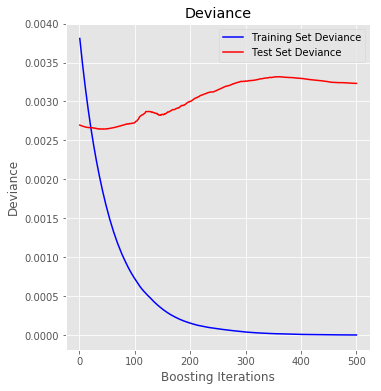

In [78]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [79]:
dados_futuro = pd.read_csv("dados_futuro.csv", sep=";")

In [80]:
dados_futuro['rotulo'] = dados_futuro['rotulo'].astype('category')
dados_futuro['rotulo_cat'] = dados_futuro['rotulo'].cat.codes

# dados_passado['rotulo'].astype(str).astype(int)
# dados_futuro['distancia_media'].astype(str).astype(int)
dados_futuro['paradas_impactadas'].astype(int)
# dados_passado['porcentagem_impactadas'].astype(str).astype(int)
# dados_passado['variacao_passageiros'].astype(str).astype(int)
# dados_passado['num_paradas'].astype(str).astype(int)
# dados_passado['paradas_afetadas'].astype(str).astype(int)
# dados_passado['impacto'].astype(str).astype(int)
dados_futuro.dtypes

rotulo                    category
distancia_media            float64
paradas_impactadas         float64
porcentagem_impactadas     float64
num_paradas                  int64
paradas_afetadas           float64
rotulo_cat                    int8
dtype: object

In [81]:
# dados_futuro

In [82]:
dados_futuro.head()

,rotulo,distancia_media,paradas_impactadas,porcentagem_impactadas,num_paradas,paradas_afetadas,rotulo_cat
0,302110,1.623,1.0,0.19,67,13.0,0
1,314110,1.079,2.2,0.29,127,37.0,1
2,314J10,1.337,1.6,0.19,141,27.0,2
3,339010,1.079,2.2,0.26,143,37.0,3
4,422110,1.390,1.3,0.10,117,12.0,4


In [83]:
# distancia_media,  paradas_impactadas,  porcentagem_impactadas,  num_paradas,  paradas_afetadas_n,  rotulo_cat
X_futuro = dados_futuro.drop(['rotulo','paradas_afetadas'],axis=1)
X_futuro['paradas_afetadas_n'] = [13, 37, 27, 37, 12, 26, 28, 20, 33, 37, 19, 13,  5, 36, 36, 19, 52, 18,
  9, 19, 15, 15, 38, 36, 37, 44, 16, 39, 18,]

In [84]:
# print(X_futuro.head())

In [85]:
y_predicted = clf.predict(X_futuro)
dados_futuro['previsao'] = y_predicted

In [86]:
dados_futuro

,rotulo,distancia_media,paradas_impactadas,porcentagem_impactadas,num_paradas,paradas_afetadas,rotulo_cat,previsao
0,302110,1.623,1.0,0.19,67,13.0,0,-0.132916
1,314110,1.079,2.2,0.29,127,37.0,1,0.060747
2,314J10,1.337,1.6,0.19,141,27.0,2,-0.051464
3,339010,1.079,2.2,0.26,143,37.0,3,0.041469
4,422110,1.390,1.3,0.10,117,12.0,4,-0.092518
5,422210,1.301,1.7,0.25,106,26.0,5,-0.040104
6,425E10,1.101,2.2,0.76,37,28.0,6,0.045602
7,428810,1.305,1.1,0.14,143,20.0,7,-0.091101
8,502610,1.315,1.8,1.00,33,NaN,8,0.057178
9,511010,1.070,2.2,0.44,84,37.0,9,0.061728


In [89]:
dados_futuro.to_csv("output.csv", index=False)

In [87]:
y_test

11   -0.16
20    0.00
25   -0.13
17   -0.10
2    -0.11
26   -0.10
31   -0.05
16   -0.08
10   -0.06
Name: variacao_passageiros, dtype: float64

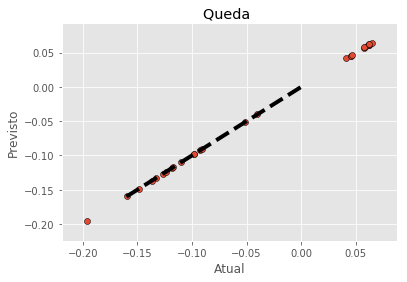

In [88]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Atual')
ax.set_ylabel('Previsto')
ax.set_title("Queda ")
plt.show()